<a href="https://colab.research.google.com/github/AhmadAlabrash/Self-Driving/blob/main/HougLines_%26_edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from google.colab.patches import cv2_imshow

In [218]:
image = cv2.imread('test.jpg')

In [219]:
gray = cv2.cvtColor(image ,cv2.COLOR_BGR2GRAY)

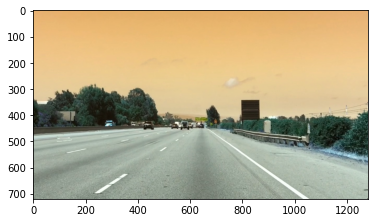

In [220]:
plt.imshow(image)

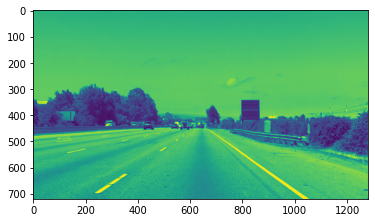

In [221]:
plt.imshow(gray)

In [222]:
kernel_size = 5

In [223]:
blur = cv2.GaussianBlur(gray ,(kernel_size,kernel_size),0)

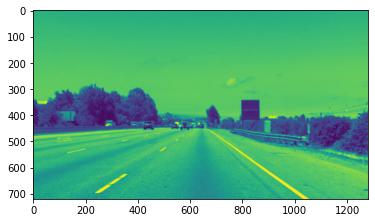

In [224]:
plt.imshow(blur)

In [225]:
low_threshold = 100
high_threshold = 200

In [226]:
masked_edges = cv2.Canny(blur ,low_threshold,high_threshold )

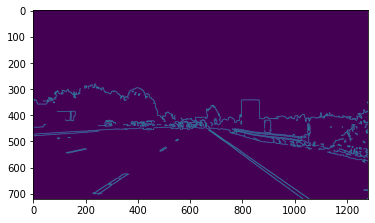

In [227]:
plt.imshow(masked_edges)

In [228]:
rho  =1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1

blank_image = np.copy(image)*0

In [229]:
lines = cv2.HoughLinesP(masked_edges,rho ,theta,threshold,np.array([]),min_line_length,max_line_gap)

In [230]:
# Red color in BGR
color = (254, 0, )
 
# Line thickness of 9 px
thickness = 9

In [231]:
for line in lines :
  for x1,y1,x2,y2 in line :
    cv2.line(blank_image ,(x1,y1),(x2,y2) ,color ,thickness)

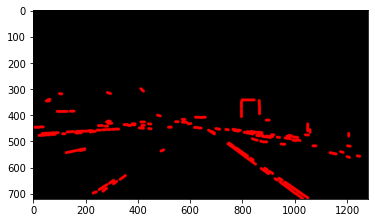

In [232]:
plt.imshow(blank_image)

In [233]:
color_masked_edges = np.dstack([masked_edges,masked_edges,masked_edges])

In [234]:
color_masked_edges.shape
blank_image.shape

(720, 1280, 3)

In [235]:
combo = cv2.addWeighted(color_masked_edges,0.8 ,blank_image,1, 0)

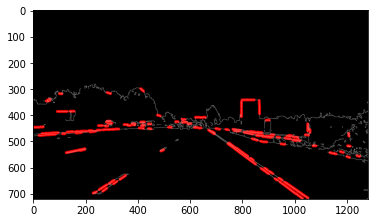

In [236]:
plt.imshow(combo)